# Librerias

In [1]:
using CSV
using DataFrames
using ScikitLearn: fit!,predict,@sk_import
using ScikitLearn.CrossValidation: train_test_split
using Plots

# Cargar datos

Cargo $X$ como los 60 valores y $y$ como la etiqueta, la cual si hay mina = $1$, si hay roca =$0$

In [2]:
dataSonar = CSV.read("Data/sonar.csv",DataFrame;  header=0);
rename!(dataSonar, :Column61 => :Class)
dataSonar.Class .= replace.(dataSonar.Class, r"M" => 1)
dataSonar.Class .= replace.(dataSonar.Class, r"R" => 0)
dataSonar.Class = parse.(Int16, dataSonar.Class)
X = select(dataSonar, Not(:Class))
y = select(dataSonar, :Class)



,Class
,Int16
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


# Analisis de los datos

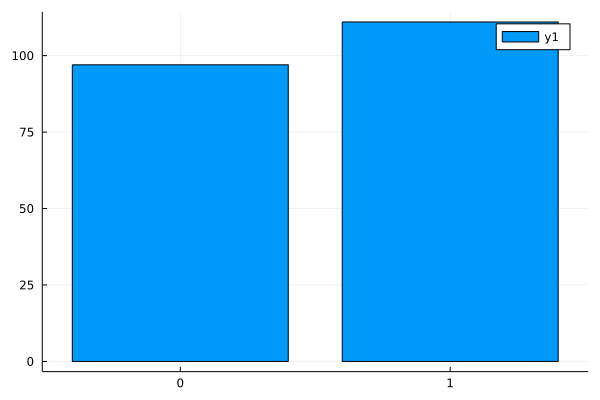

In [3]:
y_2= combine(groupby(y, :Class), nrow => :Freq)
bar(["0", "1"], y_2.Freq)

# Separar los datos
Separo los datos en 3 tipos aleatoriamente Test, Train y Validate pues son valores no balanceados.\
Estandarizamos nuestros datos para evitar el manejo de diferentes escalas en nuestros datos.\
Estandarizamos las características eliminando la media y escalando a la varianza de la unidad.\
La estandarización de una muestra $x$ donde la media es $u$ y la desviación estándar es $s$ se calcula como:
$$
z=\frac{(x-u)}{s}
$$

In [4]:
@sk_import preprocessing: StandardScaler

ymatrix = Array(y)
Xmatrix = Array(X)


X_train, X_test, y_train, y_test = train_test_split(Xmatrix, ymatrix, test_size=0.2, random_state=42, stratify=ymatrix)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test) #Usamos la media y desviacion estandar de X_train en los datos "nuevos" X_test para normalizar
y2DF= DataFrame(y_train, :auto)
y2= combine(groupby(y2DF, :1), nrow => :Freq)


,x1,Freq
,Int16,Int64
1,0,60
2,1,64


# Linear Regression

In [5]:
@sk_import linear_model: LinearRegression
modelLnR = LinearRegression()
modelLnR.fit(X_train, y_train)

predictions = modelLnR.predict(X_test)
#Convertimos a 0 o 1
prediction_class = [if x < 0.5 0 else 1 end for x in predictions];

Revisaremos la precisión comparando los valores reales y los valores previstos.

In [6]:
@sk_import metrics : confusion_matrix

TN, FP, FN, TP = confusion_matrix(y_test, prediction_class)


println("True Positive(TP)  = $(TP)")
println("False Positive(FP) = $(FP)")
println("True Negative(TN)  = $(TN)")
println("False Negative(FN) = $(FN)")

accuracyLnR =  (TP+TN) /(TP+FP+TN+FN)
print("Accuracy of the binary classification = $(accuracyLnR)")


True Positive(TP)  = 18
False Positive(FP) = 4
True Negative(TN)  = 15
False Negative(FN) = 5
Accuracy of the binary classification = 0.7857142857142857

# Logistic Regression

In [7]:
@sk_import linear_model: LogisticRegression
modelLR = LogisticRegression()
modelLR.fit(X_train, y_train)

predictions = modelLR.predict(X_test)
#Convertimos a 0 o 1
prediction_class = [if x < 0.5 0 else 1 end for x in predictions];

C:\Users\Christian Pabon\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Revisaremos la precisión comparando los valores reales y los valores previstos.

In [8]:
TN, FP, FN, TP = confusion_matrix(y_test, prediction_class)


println("True Positive(TP)  = $(TP)")
println("False Positive(FP) = $(FP)")
println("True Negative(TN)  = $(TN)")
println("False Negative(FN) = $(FN)")

accuracyLR =  (TP+TN) /(TP+FP+TN+FN)
print("Accuracy of the binary classification = $(accuracyLR)")

True Positive(TP)  = 16
False Positive(FP) = 6
True Negative(TN)  = 16
False Negative(FN) = 4
Accuracy of the binary classification = 0.7619047619047619

# Support Vector Machine

In [9]:
@sk_import svm: SVC

modelSVC = SVC()
modelSVC.fit(X_train, y_train)

predictions = modelSVC.predict(X_test)
#Convertimos a la 0 o 1
prediction_class = [if x < 0.5 0 else 1 end for x in predictions];

C:\Users\Christian Pabon\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Revisaremos la precisión comparando los valores reales y los valores previstos.

In [10]:
TN, FP, FN, TP = confusion_matrix(y_test, prediction_class)


println("True Positive(TP)  = $(TP)")
println("False Positive(FP) = $(FP)")
println("True Negative(TN)  = $(TN)")
println("False Negative(FN) = $(FN)")

accuracySVC =  (TP+TN) /(TP+FP+TN+FN)
print("Accuracy of the binary classification = $(accuracySVC)")

True Positive(TP)  = 19
False Positive(FP) = 3
True Negative(TN)  = 16
False Negative(FN) = 4
Accuracy of the binary classification = 0.8333333333333334

# k Nearest Neighbor

In [11]:
@sk_import neighbors : KNeighborsClassifier
modelKNN = KNeighborsClassifier()
modelKNN.fit(X_train, y_train)

predictions = modelKNN.predict(X_test)
#Convertimos a 0 o 1
prediction_classKNN = [if x < 0.5 0 else 1 end for x in predictions];

C:\Users\Christian Pabon\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Revisaremos la precisión comparando los valores reales y los valores previstos.

In [12]:
TN, FP, FN, TP = confusion_matrix(y_test, prediction_classKNN)

println("True Positive(TP)  = $(TP)")
println("False Positive(FP) = $(FP)")
println("True Negative(TN)  = $(TN)")
println("False Negative(FN) = $(FN)")

accuracyKNN =  (TP+TN) /(TP+FP+TN+FN)
print("Accuracy of the binary classification = $(accuracyKNN)")

True Positive(TP)  = 20
False Positive(FP) = 2
True Negative(TN)  = 16
False Negative(FN) = 4
Accuracy of the binary classification = 0.8571428571428571

# Decision Tree

In [13]:
@sk_import tree : DecisionTreeClassifier
modelDTC = DecisionTreeClassifier()
modelDTC.fit(X_train, y_train)

predictions = modelDTC.predict(X_test)
#Convertimos a 0 o 1
prediction_class = [if x < 0.5 0 else 1 end for x in predictions];

Revisaremos la precisión comparando los valores reales y los valores previstos.

In [14]:
TN, FP, FN, TP = confusion_matrix(y_test, prediction_class)


println("True Positive(TP)  = $(TP)")
println("False Positive(FP) = $(FP)")
println("True Negative(TN)  = $(TN)")
println("False Negative(FN) = $(FN)")

accuracyDTC =  (TP+TN) /(TP+FP+TN+FN)
print("Accuracy of the binary classification = $(accuracyDTC)")

True Positive(TP)  = 16
False Positive(FP) = 6
True Negative(TN)  = 15
False Negative(FN) = 5
Accuracy of the binary classification = 0.7380952380952381

# Seleccionamos el más acertado

k Nearest Neighbor es el Accuracy más alto que nos generaron los datos de entrenamiento con los de prueba \
Ahora usaremos el modelo con los datos de Validacion y veremos la curva de ROC

In [15]:
X_val = scaler.transform(X_val)

predictions = modelKNN.predict(X_val)

#Convertimos a 0 o 1
prediction_classKNN = [if x < 0.5 0 else 1 end for x in predictions];


In [18]:
TN, FP, FN, TP = confusion_matrix(y_val, prediction_classKNN)

println("True Positive(TP)  = $(TP)")
println("False Positive(FP) = $(FP)")
println("True Negative(TN)  = $(TN)")
println("False Negative(FN) = $(FN)")

accuracyKNN =  (TP+TN) /(TP+FP+TN+FN)
print("Accuracy of the binary classification = $(accuracyKNN)")

True Positive(TP)  = 23
False Positive(FP) = 2
True Negative(TN)  = 14
False Negative(FN) = 3
Accuracy of the binary classification = 0.8809523809523809

# ROC curve

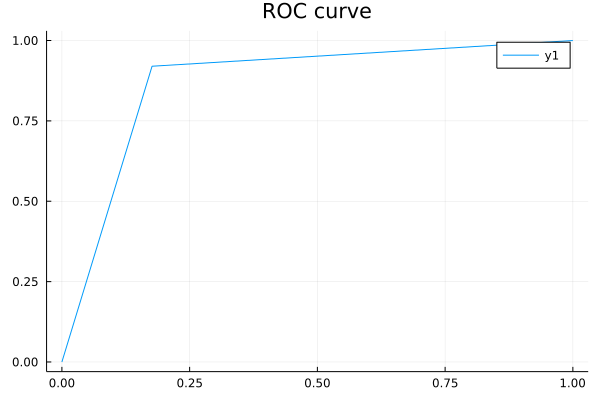

In [17]:
@sk_import metrics : roc_curve
fpr, tpr, thresholds = roc_curve(y_val, prediction_classKNN)
plot(fpr, tpr)
title!("ROC curve")

Podemos ver que el modelo nos da una buena curva ROC con los datos de validacion